In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
def get_solution(k, I = 1):
    system_matrix = np.array([[-1, 1],
                              [np.exp(k), -np.exp(-k)]])
    sources = np.array([[k*I],[0]])
    a, b = np.linalg.solve(system_matrix, sources).T[0]
    def result(xs):
        return a*np.exp(k*xs) + b*np.exp(-k*xs)
    return result


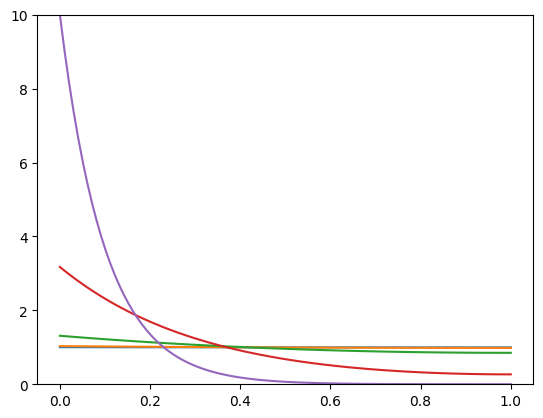

In [4]:

xs = np.linspace(0, 1, 100)
ks = np.logspace(-1, 1, 5)
#ks = [0.5/0.7]
for k in ks:
    #f = get_cylindrical_solution(k)
    f = get_solution(k)
    plt.plot(xs, f(xs))
    
plt.gca().set_ylim(bottom = 0, top=10)
plt.show()

In [5]:
from scipy.special import ivp, kvp, i0, k0, i1, k1

def get_cylindrical_solution(k):
    r_max = 1
    J_r_0 = np.array([ivp(0,k), kvp(0,k)])   # = J(1) = 0
    J_int_1 = (2*np.pi/k**2)*np.array([k*r_max*i1(k*r_max) , -k*r_max*k1(k*r_max) + 1]) # = k*int_0^1 2pi r phi dr 
    M = np.vstack((J_r_0, J_int_1))
    
    v = np.array([[0], [np.pi*r_max**2]])
    A, B = np.linalg.solve(M, v).T[0]
    def result(x):
        return A*i0(k*x) + B*k0(k*x)
    return result

In [132]:
from scipy import integrate

def test(k):
    fn = get_cylindrical_solution(k)
    return integrate.quad(lambda r: 2*np.pi*r*fn(r), 
                             0, 1,
                            )

test(1)

(1.0, 1.0402789740737717e-13)

In [35]:
xs = np.linspace(0, 1, 100)
ks = np.logspace(-1, 1, 5)

cyl_solutions = pd.DataFrame(xs, columns = ['x'])
for k in ks:
    fn = get_cylindrical_solution(k)
    cyl_solutions[k] = fn(cyl_solutions.x)
    
plane_solutions = pd.DataFrame(xs, columns = ['x'])
for k in ks:
    fn = get_solution(k)
    plane_solutions[k] = fn(plane_solutions.x)

In [45]:
df = (
    plane_solutions
    .melt('x', var_name='k', value_name='phi')
    .assign(sol_type='planar')
    .append(
        cyl_solutions
        .melt('x', var_name='k', value_name='phi')
        .assign(sol_type='cyl'),
    )
)
df

,x,k,phi,sol_type
0,0.000000,0.1,1.003331,planar
1,0.010101,0.1,1.003231,planar
2,0.020202,0.1,1.003131,planar
3,0.030303,0.1,1.003033,planar
4,0.040404,0.1,1.002935,planar
...,...,...,...,...
495,0.959596,10,0.002029,cyl
496,0.969697,10,0.001959,cyl
497,0.979798,10,0.001911,cyl
498,0.989899,10,0.001882,cyl


<IPython.core.display.Javascript object>

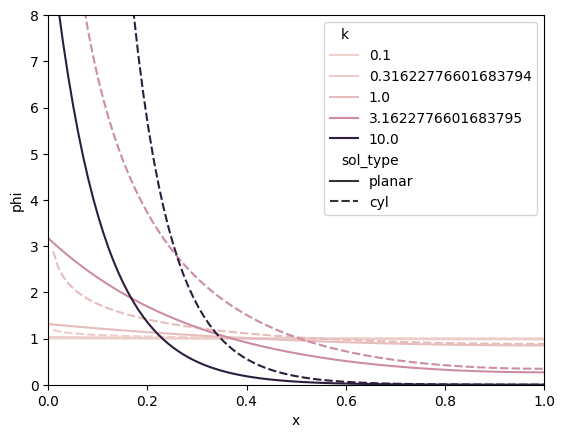

In [50]:
if __name__ == '__main__':
    sns.lineplot(data = df,
                 x = 'x',
                 y = 'phi',
                 hue = 'k',
                 style = 'sol_type',
                )
    plt.gca().set_ylim(bottom = 0, top = 8)
    plt.gca().set_xlim(left = 0, right = 1)
    plt.show()

In [51]:
def get_lines(ks=np.logspace(-1,1, 5), xs=np.linspace(0, 1, 100)):
    cyl_solutions = pd.DataFrame(xs, columns = ['x'])
    for k in ks:
        fn = get_cylindrical_solution(k)
        cyl_solutions[k] = fn(cyl_solutions.x)

    plane_solutions = pd.DataFrame(xs, columns = ['x'])
    for k in ks:
        fn = get_solution(k)
        plane_solutions[k] = fn(plane_solutions.x)

    df = (
        plane_solutions
        .melt('x', var_name='k', value_name='phi')
        .assign(sol_type='planar')
        .append(
            cyl_solutions
            .melt('x', var_name='k', value_name='phi')
            .assign(sol_type='cyl'),
        )
    )
    return df

<IPython.core.display.Javascript object>

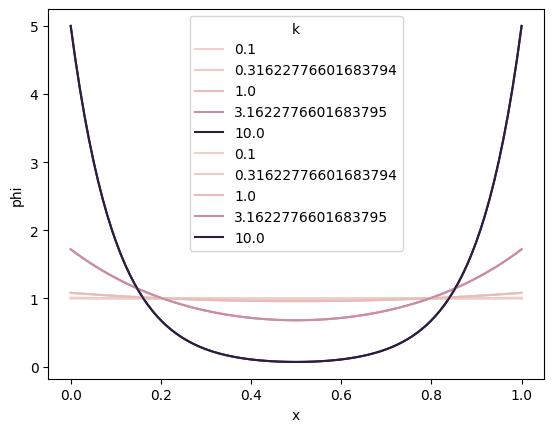

In [7]:
def symmetric_fn(k = 1):
    fn = get_solution(k)
    def wrapped(x):
        return (fn(x) + fn(1-x))/2
    return wrapped

def get_symmetric(ks = np.logspace(-1, 1, 5), xs = np.linspace(0,1,100)):
    sol = pd.DataFrame(xs, columns = ['x'])
    for k in ks:
        fn = symmetric_fn(k)
        sol[k] = fn(sol.x)
    df = (
        sol
        .melt('x', var_name='k', value_name='phi')        
    )
    return df

df = get_symmetric()
    
sns.lineplot(
    data = df,
         x = 'x',
         y = 'phi',
         hue = 'k'
        )

plt.show()
         